In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

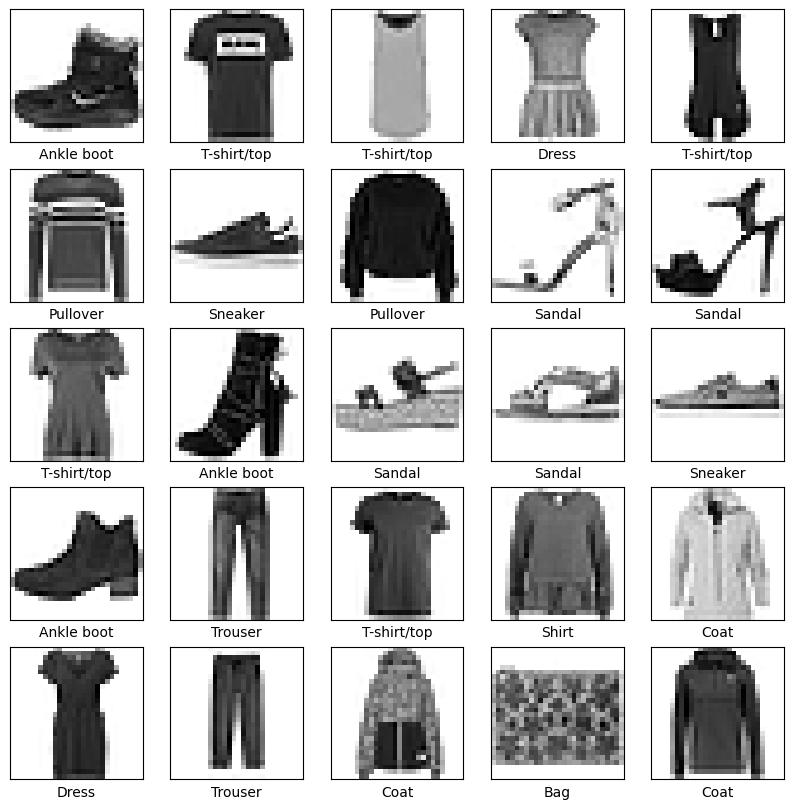

In [5]:
plt.figure(figsize=[10, 10])
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [7]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

In [8]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [13]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [15]:
model.compile(
    optimizer="adam",
    loss=keras.losses.categorical_crossentropy,
    metrics=["accuracy"]
)

In [17]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 40s 43ms/step - loss: 0.3049 - accuracy: 0.8920 - val_loss: 0.2793 - val_accuracy: 0.8991
Epoch 2/10
938/938 [==============================] - 40s 43ms/step - loss: 0.2879 - accuracy: 0.8958 - val_loss: 0.2669 - val_accuracy: 0.9014
Epoch 3/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2704 - accuracy: 0.9039 - val_loss: 0.2551 - val_accuracy: 0.9052
Epoch 4/10
938/938 [==============================] - 40s 43ms/step - loss: 0.2574 - accuracy: 0.9072 - val_loss: 0.2547 - val_accuracy: 0.9094
Epoch 5/10
938/938 [==============================] - 37s 40ms/step - loss: 0.2456 - accuracy: 0.9105 - val_loss: 0.2466 - val_accuracy: 0.9086
Epoch 6/10
938/938 [==============================] - 39s 42ms/step - loss: 0.2362 - accuracy: 0.9138 - val_loss: 0.2440 - val_accuracy: 0.9073
Epoch 7/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2251 - accuracy: 0.9177 - val_loss: 0.2441 - val_accuracy:

In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.2441 - accuracy: 0.9153 - 3s/epoch - 8ms/step


In [19]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9153000116348267


Text(0.5, 1.0, 'Loss Curves')

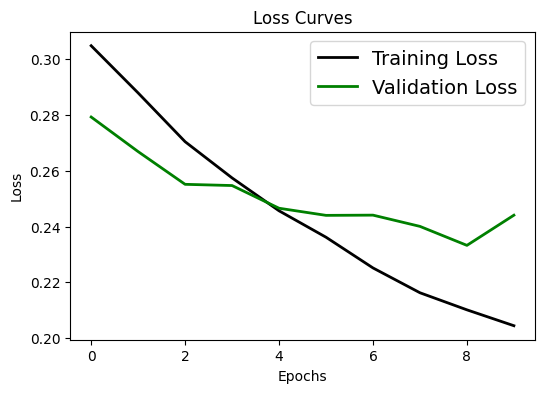

In [20]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

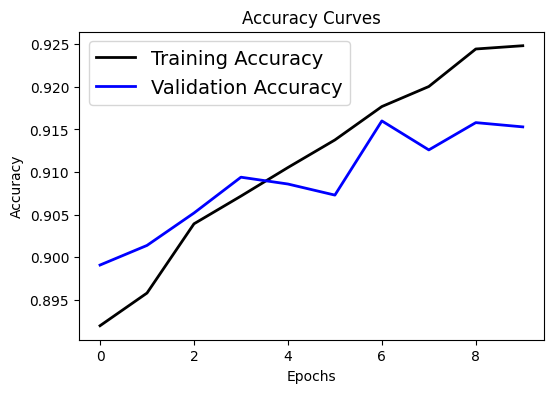

In [21]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [22]:
pred = model.predict(test_images)
print(pred)

313/313 [==============================] - 2s 7ms/step
[[1.3593142e-11 6.3893492e-13 6.3236254e-13 ... 9.0775620e-06
  8.3439271e-12 9.9999052e-01]
 [4.4259364e-06 4.5411579e-18 9.9995798e-01 ... 4.8608378e-23
  1.4597261e-10 8.8766958e-23]
 [1.8847608e-14 9.9999994e-01 6.0706671e-19 ... 5.3025028e-29
  6.5398905e-18 1.9183264e-26]
 ...
 [2.9047204e-08 2.7978550e-17 1.4292980e-11 ... 2.5199450e-13
  9.9999982e-01 6.4884431e-13]
 [1.0049677e-11 9.9999994e-01 2.6759215e-17 ... 5.8591214e-26
  1.9704165e-16 3.1187501e-22]
 [1.7283162e-05 2.9901466e-07 1.0018694e-06 ... 1.9294862e-02
  3.4983389e-04 2.3645260e-03]]


In [23]:
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[9 2 1 ... 8 1 5]


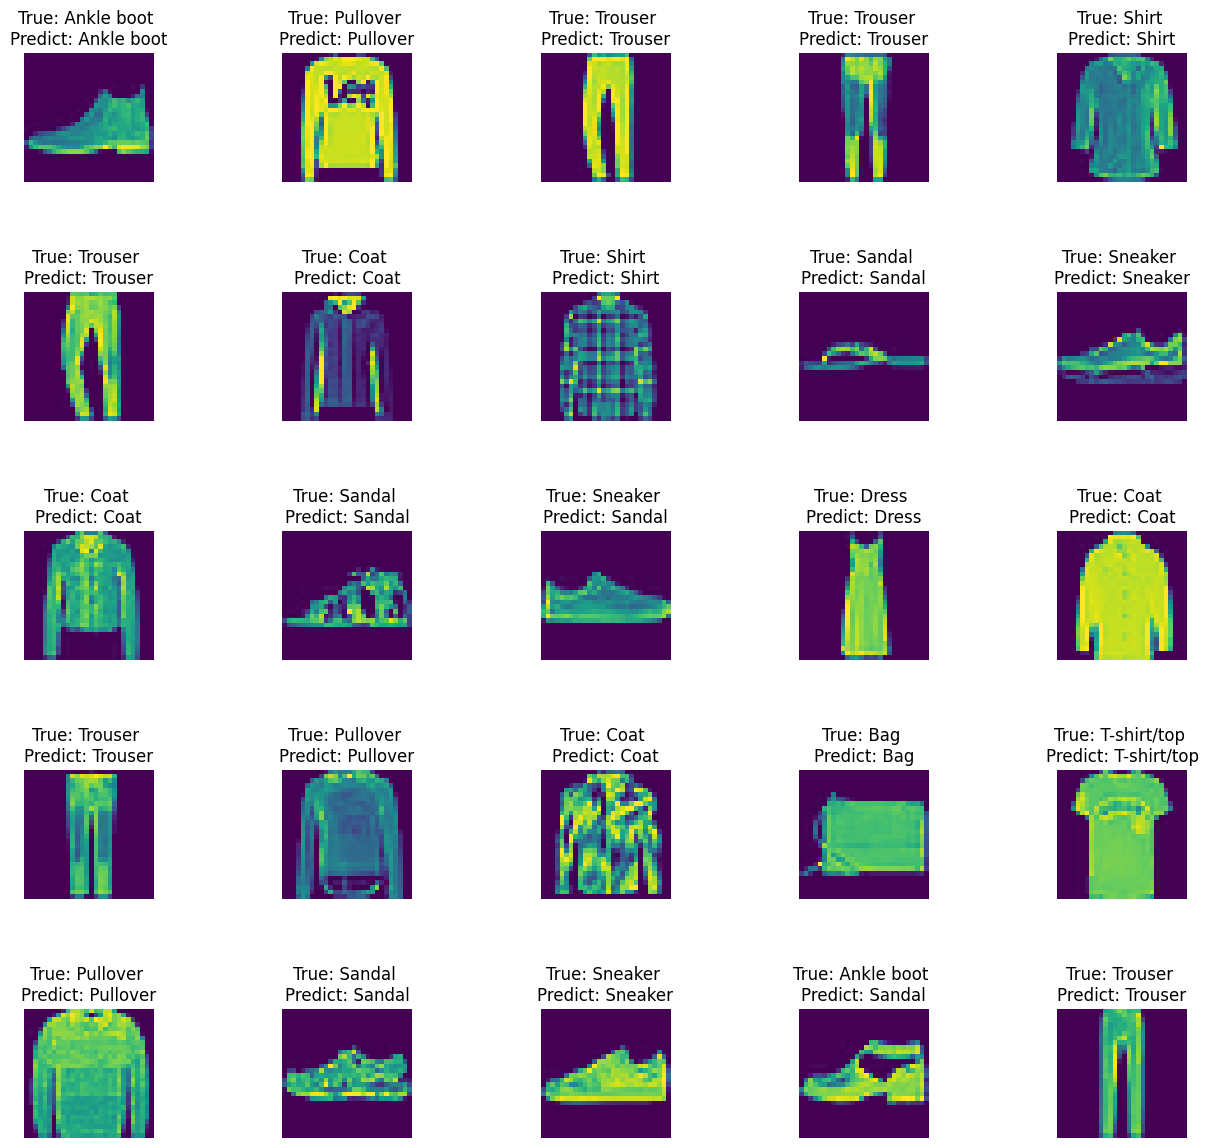

In [24]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [25]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model_weights.h5')

In [26]:
from google.colab import files
files.download('model.json')
files.download('model_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>